In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
%matplotlib inline
from sklearn.metrics import classification_report
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("beatlesrandom.csv")
data = data.rename(columns = {"Unnamed: 0":"INDEX"})

In [3]:
data.drop(['INDEX'],inplace=True, axis=1)
data.drop(['album_cover'],inplace=True, axis=1)

In [5]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_name,track_number,short_album_name,release_date,duration_seconds,track1,last_track
0,0.294,0.407,0,-11.575,1,0.0308,0.0258,0.000219,0.0852,0.0378,101.052,4,Blue Jay Way,4,Magical Mystery Tour,1967-11-27,235.067,0,0
1,0.612,0.788,0,-6.251,1,0.0335,0.3670,0.000000,0.3820,0.9610,129.161,4,You Can't Do That,12,A Hard Day's Night,1964-07-10,154.893,0,0
2,0.422,0.656,4,-8.412,1,0.0397,0.0126,0.027900,0.2680,0.5490,173.930,3,Oh! Darling,4,Abbey Road,1969-09-26,207.240,0,0
3,0.538,0.478,11,-8.957,0,0.0388,0.4720,0.000000,0.1700,0.5270,59.004,4,Dig A Pony,2,Let It Be,1970-05-08,235.000,0,0
4,0.297,0.613,9,-9.065,1,0.0931,0.0385,0.000040,0.0734,0.3380,170.962,4,Magical Mystery Tour,1,Magical Mystery Tour,1967-11-27,170.107,1,0


# Logistic Regression 
Predict whether a song is first on the album.

In [6]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_name', 'track_number', 'short_album_name',
       'release_date', 'duration_seconds', 'track1', 'last_track'],
      dtype='object')

In [16]:
features = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature','duration_seconds']]
label= data["track1"]

# Scale Features 

In [25]:
features = preprocessing.StandardScaler().fit(features).transform(features.astype(float))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.20,random_state=1,stratify=label)

# Model
Decision Boundry is 50% 

In [65]:
logreg=LogisticRegression()

In [66]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [67]:
prediction = logreg.predict(X_test)

# ROC CURVE 

In [68]:
prediction_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,prediction_prob)

Returns Probability of Predicted Labels being 1 (Positive)

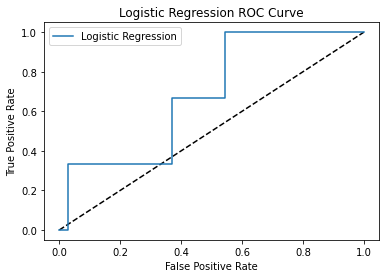

In [69]:
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.show();

# Compute ROC_AUC score

In [70]:
print(round(roc_auc_score(y_test,prediction_prob),2))

0.69


# AUC with cross validation

In [71]:
cv_scores = cross_val_score(logreg,features, label,cv=10,scoring='roc_auc')

In [72]:
print(cv_scores)

[0.5        0.38888889 0.38888889 0.83333333 0.44444444 0.23529412
 0.55882353 0.82352941 0.32352941 0.88235294]


In [73]:
print("Accuracy of model is",metrics.accuracy_score(y_test, prediction))

Accuracy of model is 0.9210526315789473


In [74]:
print("Accuracy of training is",logreg.score(X_train,y_train))

Accuracy of training is 0.9210526315789473


In [76]:
print(classification_report(y_test, prediction,zero_division=0))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.00      0.00      0.00         3

    accuracy                           0.92        38
   macro avg       0.46      0.50      0.48        38
weighted avg       0.85      0.92      0.88        38



The test model only had 3 instances of a song being the first track and failed at correctly identifying those instances.
The model only had great accuracy because of the very low amount of songs that were actually first track.
We only 14 albums = 14 first songs. 

This logistic regressin wasn't sucessful to do the imbalance between the amount of songs that can be classified as a first song. 

In [85]:
data["short_album_name"].value_counts()

The Beatles                              20
Sgt. Pepper's Lonely Hearts Club Band    20
Abbey Road                               17
Please Please Me                         14
Revolver                                 14
With The Beatles                         14
Rubber Soul                              14
Beatles For Sale                         14
Help!                                    14
A Hard Day's Night                       13
Yellow Submarine                         13
Let It Be                                12
Magical Mystery Tour                     11
Name: short_album_name, dtype: int64

There is another feature in the data set Mode which is binary classificaton.
Going to try a logistic mode using that as the target variable. 

# Logistic Regression
Predict whether a song is major or minor based on audio features 

In [86]:
features2 = data[['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature','duration_seconds']]
label2= data["mode"]

In [87]:
features2 = preprocessing.StandardScaler().fit(features2).transform(features2.astype(float))

In [89]:
X_train, X_test, y_train, y_test = train_test_split(features2, label2, test_size = 0.20,random_state=1,stratify=label2)

In [90]:
logreg=LogisticRegression()

In [91]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [92]:
prediction = logreg.predict(X_test)

In [93]:
prediction_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,prediction_prob)

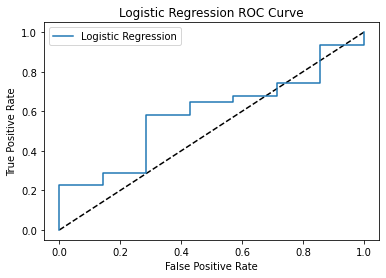

In [94]:
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.show();

# Compute ROC_AUC score

In [96]:
cv_scores = cross_val_score(logreg,features2, label2,cv=10,scoring='roc_auc')
print(cv_scores)

[0.60416667 0.89583333 0.4375     0.55       0.53333333 0.33333333
 0.65       0.56666667 0.58333333 0.6       ]


In [97]:
print("Accuracy of model is",metrics.accuracy_score(y_test, prediction))

Accuracy of model is 0.8157894736842105


In [98]:
print("Accuracy of training is",logreg.score(X_train,y_train))

Accuracy of training is 0.8026315789473685


In [99]:
print(classification_report(y_test, prediction,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        31

    accuracy                           0.82        38
   macro avg       0.41      0.50      0.45        38
weighted avg       0.67      0.82      0.73        38



In [101]:
y_testarray = np.array(y_test)

In [103]:
accuracydf=pd.DataFrame(y_testarray,prediction)
accuracydf.rename(columns = {0:'Actual Mode'}, inplace = True)
accuracydf

,Actual Mode
1,1
1,1
1,1
1,0
1,1
1,0
1,1
1,1
1,1
1,1


The error from our model was the inability to predict 0 when the correct classfication was 0.
Same problem as before, our model is unable to predict any instances of 0 or attempt to.